In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

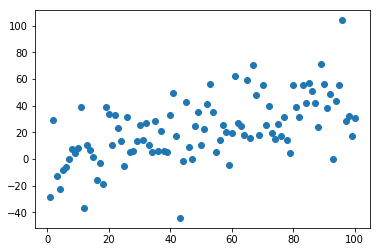

In [2]:
x = np.arange(1,101)
y = x/2 + np.random.randn(100)*20
X = np.vstack((x,y))
plt.plot(X[0], X[1], 'o')
plt.show()

In [3]:
def normalize(X):
    X_centered = [arr - arr.mean() for arr in X]
    mean = [arr.mean() for arr in X]
    return X_centered, mean

In [4]:
def transform(X, K_components):
    
    X = np.array(X)    
#     Covariance_matrix = np.cov(X)
    Covariance_matrix = np.dot(X.T, X) / len(X)

    U, S, V = np.linalg.svd(Covariance_matrix)
    
    matrix_reduced = - U[:, :K_components]

#     X_new = np.dot(X.T, matrix_reduced)
    X_new = np.dot(matrix_reduced.T, X.T)

    return X_new, matrix_reduced

In [5]:
def restore(X_new, matrix_reduced, norm_params):
    
    X_restored = np.dot(matrix_reduced, X_new) + norm_params
    return X_restored.T

In [6]:
X_centered, mean = normalize(X)

X_new, matrix_reduced = transform(X_centered, 100)

X_restored = restore(X_new, matrix_reduced, mean)

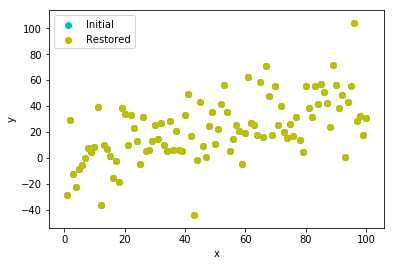

In [7]:
plt.figure()
plt.scatter(X[0], X[1], color='c', label='Initial')
plt.scatter(X_restored[0], X_restored[1], color='y', label='Restored')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
from PIL import Image
number_of_components_image = 100

# read image 
img = Image.open('photo.jpg')
# black & white transformation
img = img.convert('L')

# create numpy array
img_X = (np.copy(np.asarray(img))).astype(float)

# normalization
X_norm_img, norm_params = normalize(img_X)

# dimension reduction
X_reduced_img, evect_reduced = transform(X_norm_img, number_of_components_image)

# dimension restoring
X_restored_img = restore(X_reduced_img, evect_reduced, norm_params)

# create from restored array
restored_img = Image.fromarray(X_restored_img.astype('uint8'))

img.show()
restored_img.show()
